In [1]:
import pandas as pd
import numpy as np
import env

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from wrangle import get_zillow,prep_zillow,split_data
from explore import plot_categorical_and_continuous,plot_variable_pairs
warnings.filterwarnings('ignore')

In [2]:
zillow = (get_zillow)

In [3]:
zillow = prep_zillow(zillow)

this file exists, reading csv


In [4]:
train,validate,test = split_data(zillow)

In [5]:
house_corr =train.drop(columns="county").corr(method="spearman")

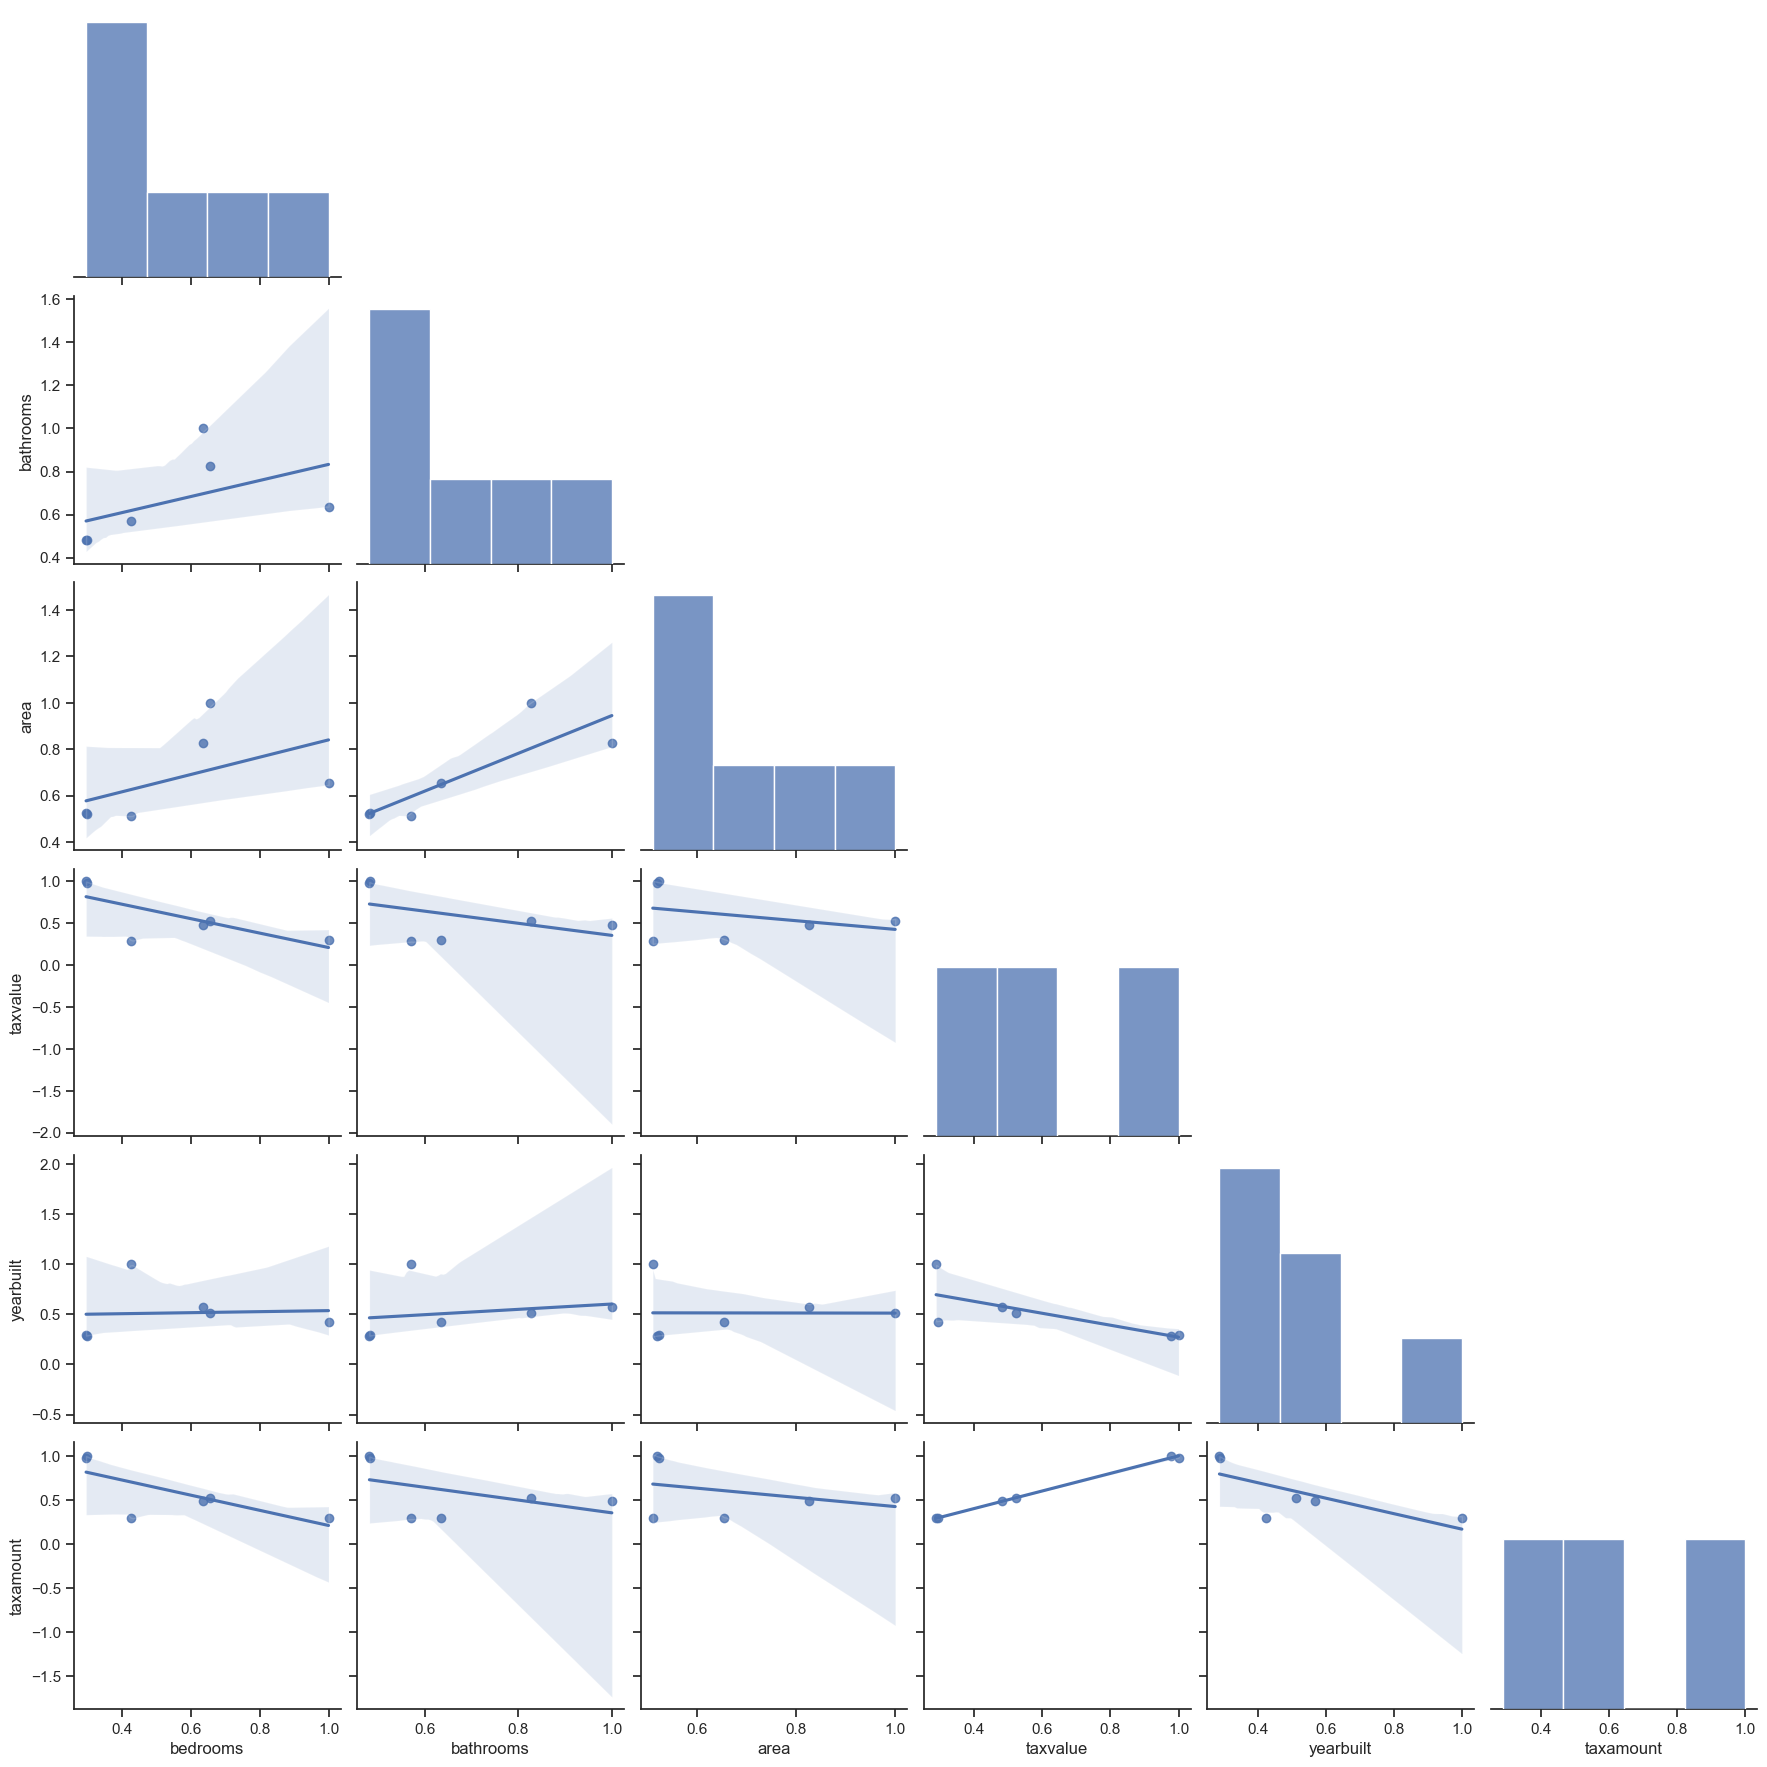

In [6]:
plot_variable_pairs(house_corr)

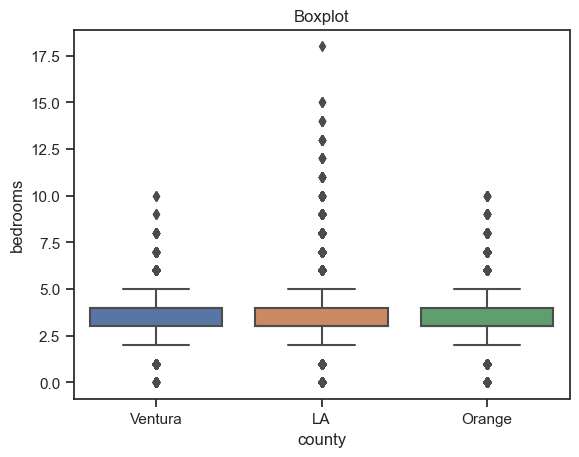

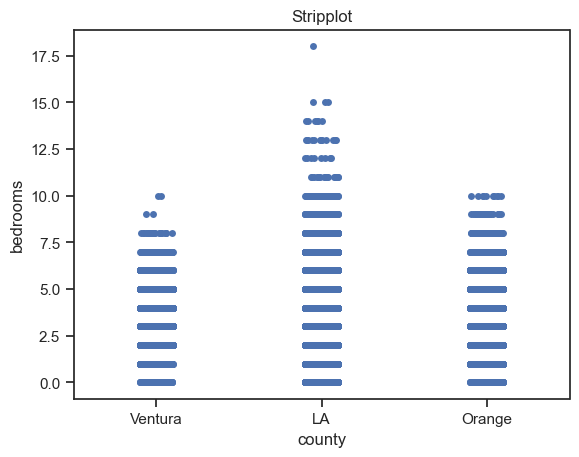

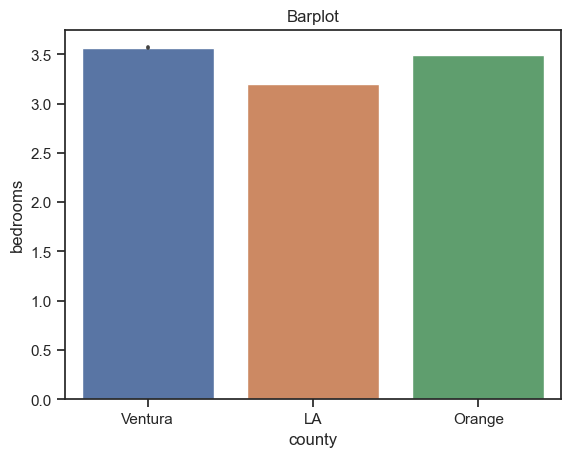

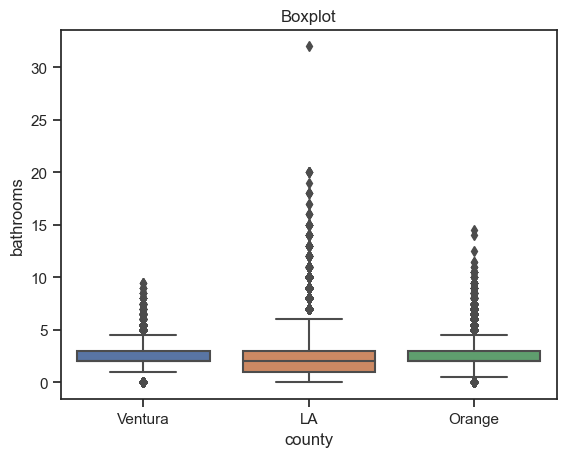

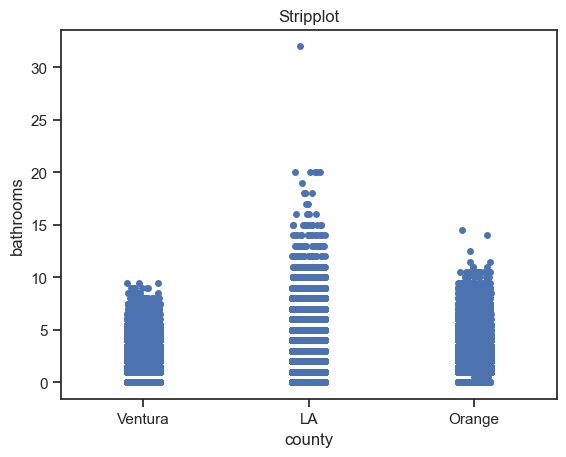

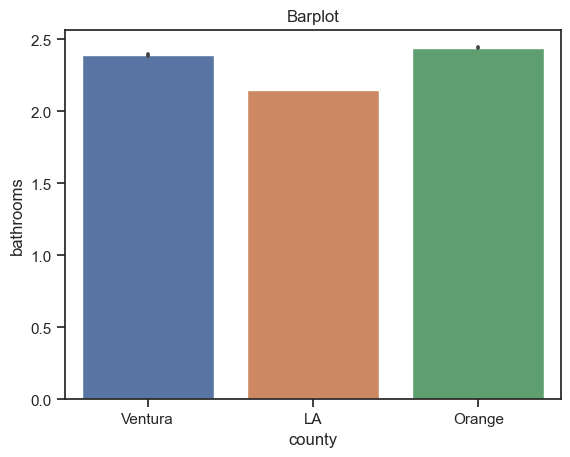

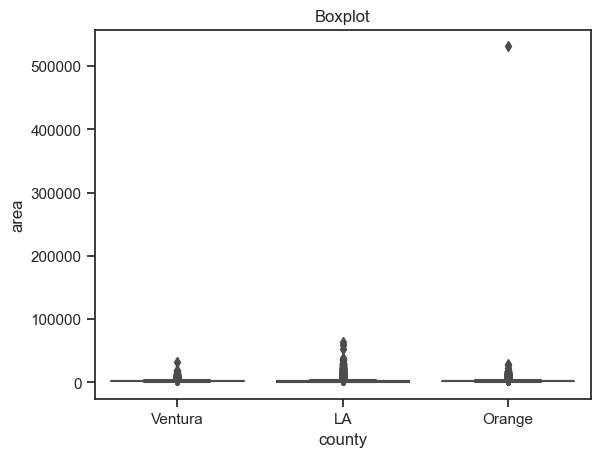

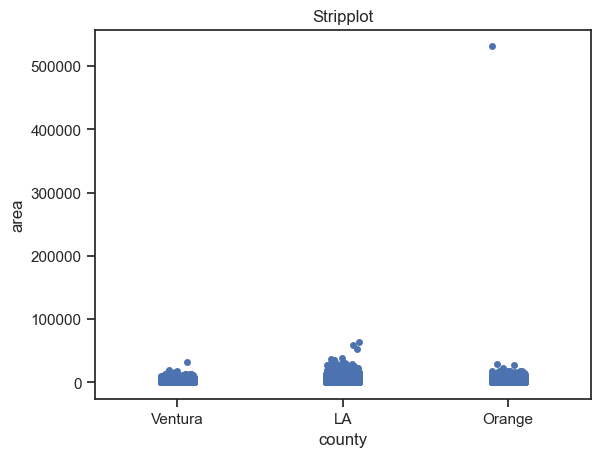

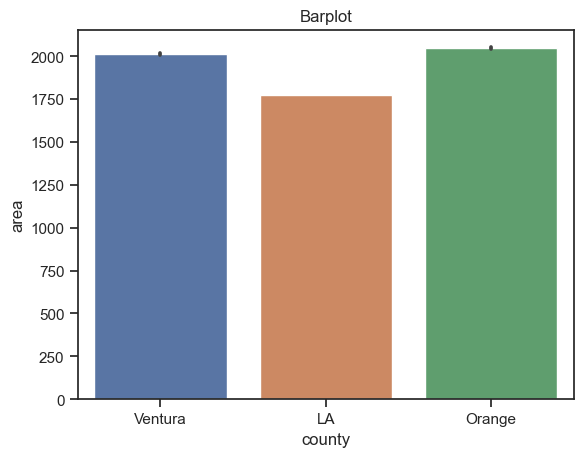

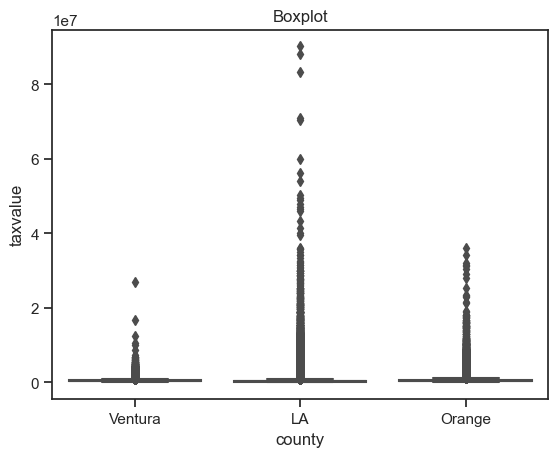

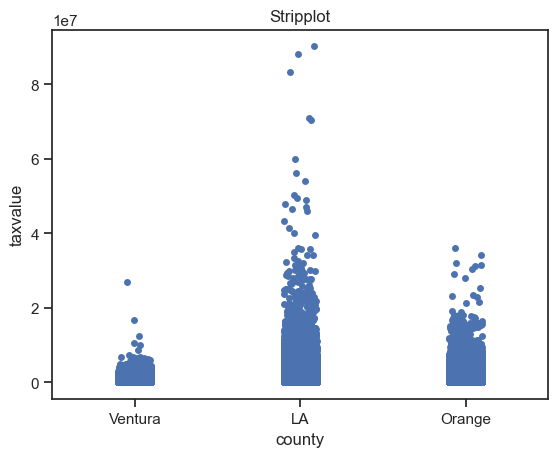

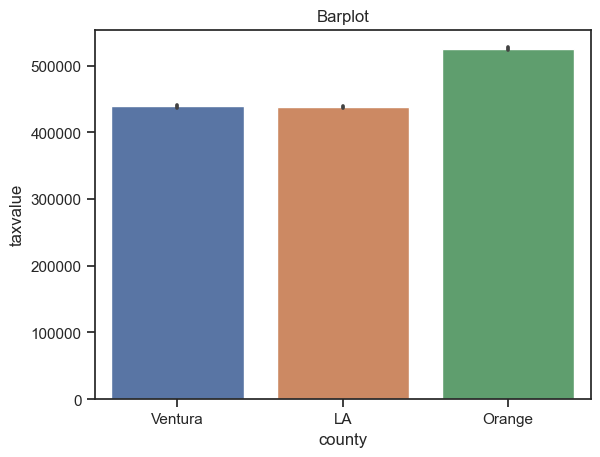

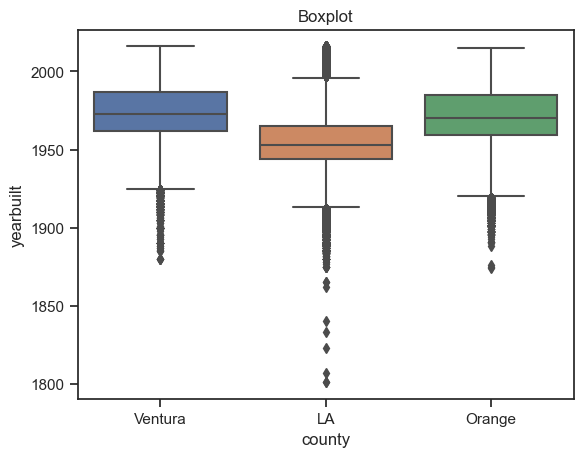

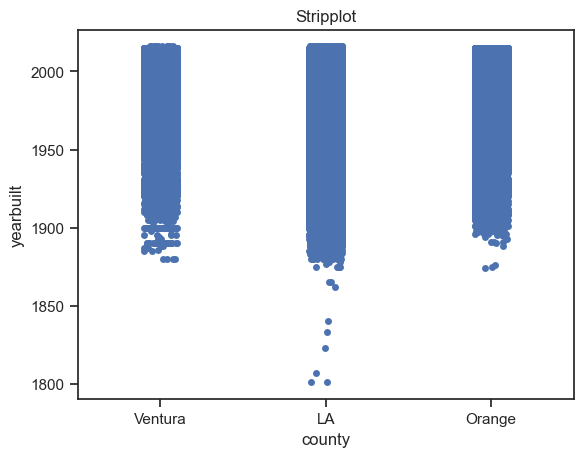

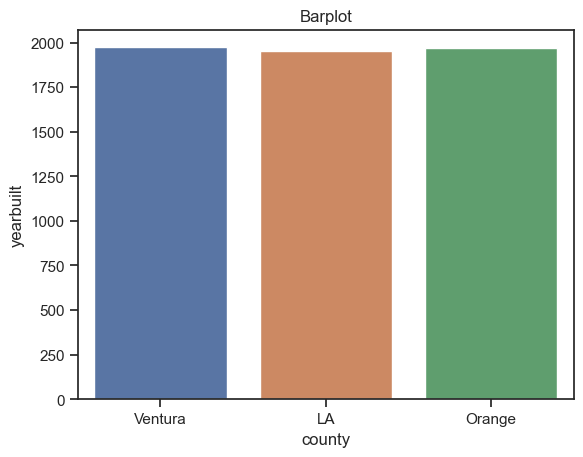

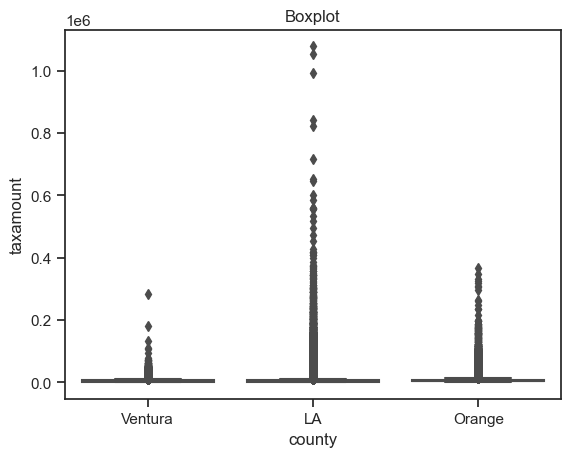

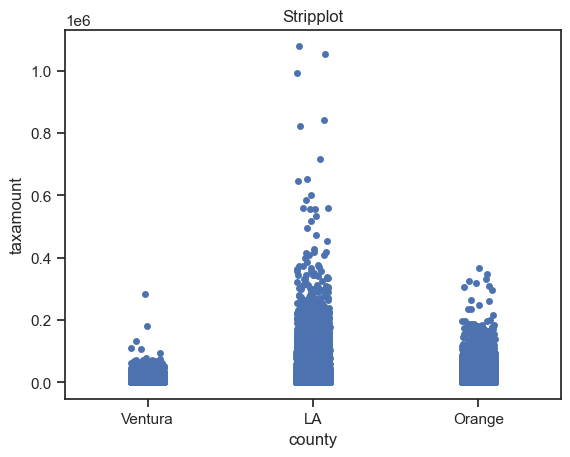

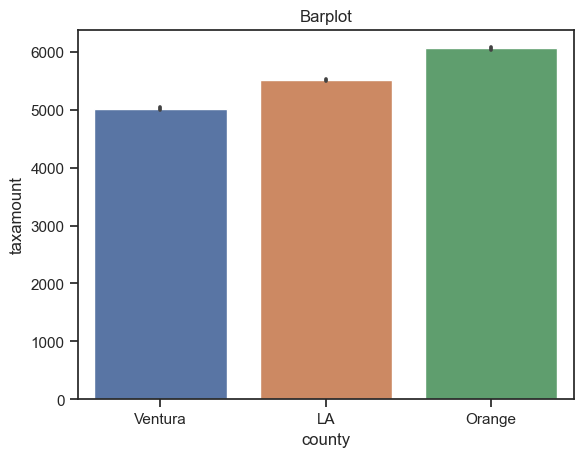

In [21]:
train_nocounty =train.drop(columns="county")
for col in train_nocounty.columns:

    plot_categorical_and_continuous(train,train.county,col)

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount',
       'county'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 462820 to 778196
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1284141 non-null  int64  
 1   bathrooms  1284141 non-null  float64
 2   area       1284141 non-null  int64  
 3   taxvalue   1284141 non-null  int64  
 4   yearbuilt  1284141 non-null  int64  
 5   taxamount  1284141 non-null  float64
 6   county     1284141 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 78.4+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot with bins for better visualization
sns.histplot(data=train, x='yearbuilt', y='taxamount', bins=30, cbar=True)

# Add a horizontal line for mean tax amount
mean_tax_amount = 200  # Replace with your actual mean value
plt.axhline(mean_tax_amount, color='red', linestyle='dashed', linewidth=2, label="Mean Tax Amount")

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Tax Amount')
plt.title('Distribution of Tax Amount by Year Built')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'yearbuilt' and 'taxamount' are columns in your DataFrame
# Create a new DataFrame with counts for each combination of 'yearbuilt' and 'taxamount'


# Create a bar plot
sns.barplot(data=train, x='yearbuilt', y='taxamount')

# Add a horizontal line for mean (replace 'mean4' with your actual mean value)
plt.axhline(200, color='red', linestyle='dashed', linewidth=2, label="Tax Amount Mean")

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Tax Amount')
plt.title('Count of Houses by Year Built and Tax Amount')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'yearbuilt' and 'taxamount' are columns in your DataFrame
# Create a new DataFrame with counts for each combination of 'yearbuilt' and 'taxamount'

# Binning the 'yearbuilt' column
train['yearbins'] = pd.cut(train['yearbuilt'], bins=range(1800, 2030, 20), right=False)

# Create a bar plot
sns.barplot(data=train, x='yearbins', y='taxamount')

# Add a horizontal line for mean (replace 'mean4' with your actual mean value)
#plt.axhline(200, color='red', linestyle='dashed', linewidth=2, label="Tax Amount Mean")

# Add labels and title
plt.xlabel('Year Built Bins')
plt.ylabel('Tax Amount')
plt.title('Houses by Year Built and Tax Amount')

# Show legend
#plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [18]:


# Assuming 'train' is your dataframe and 'salesamount' is the property value column
property_value_column = 'taxvalue'

# Get continuous columns (excluding 'property_value')
continuous_columns = [col for col in train.columns if train[col].dtype != 'category' and col != property_value_column]

# Calculate Spearman's correlation for each continuous variable with 'property_value'
for col in continuous_columns:
    spearman_corr, p_value = spearmanr(train[col], train[property_value_column])
    print(f"Spearman's correlation coefficient between '{col}' and 'taxvalue': {round(spearman_corr,2)}")
    print(f"P-value: {p_value}")
    print('\n')

Spearman's correlation coefficient between 'bedrooms' and 'taxvalue': 0.3
P-value: 0.0


Spearman's correlation coefficient between 'bathrooms' and 'taxvalue': 0.48
P-value: 0.0


Spearman's correlation coefficient between 'area' and 'taxvalue': 0.52
P-value: 0.0


Spearman's correlation coefficient between 'yearbuilt' and 'taxvalue': 0.29
P-value: 0.0


Spearman's correlation coefficient between 'taxamount' and 'taxvalue': 0.98
P-value: 0.0


Spearman's correlation coefficient between 'county' and 'taxvalue': 0.15
P-value: 0.0


